## Load packages 

In [1]:
import pandas as pd #importing pandas package
import numpy as np #importing numpy package

## Read CSV

In [2]:
data = pd.read_csv("https://data.smartcolumbusos.com/api/v1/dataset/dd66bd77-7fa2-4b57-9a21-8d1606430d5c/download?_format=csv")

## Exploration

In [3]:
data.shape #shape of the whole dataframe (row, column)

(36, 5)

In [4]:
data

,age 11 categories,deaths,population,sex,sort
0,55-64,0,0,Unknown,66
1,25-34,221,749931,Female,8
2,< 1,0,70647,Male,26
3,65-74,6,576294,Female,16
4,Unk,0,0,Female,22
5,1-4,0,273310,Female,2
6,< 1,0,0,Unknown,52
7,85+,0,0,Unknown,72
8,45-54,133,784260,Female,12
9,65-74,34,504736,Male,42


In [5]:
data.columns

Index(['age 11 categories', 'deaths', 'population', 'sex', 'sort'], dtype='object')

In [6]:
data.dtypes

age 11 categories    object
deaths                int64
population            int64
sex                  object
sort                  int64
dtype: object

In [7]:
data.describe()

,deaths,population,sort
count,36.000000,36.000000,36.00000
mean,65.472222,322621.472222,37.00000
std,130.523449,338515.069211,22.64004
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,17.50000
50%,0.000000,200805.500000,37.00000
75%,74.500000,717686.000000,56.50000
max,539.000000,827746.000000,74.00000


In [8]:
data.head() #showing first 5

,age 11 categories,deaths,population,sex,sort
0,55-64,0,0,Unknown,66
1,25-34,221,749931,Female,8
2,< 1,0,70647,Male,26
3,65-74,6,576294,Female,16
4,Unk,0,0,Female,22


In [9]:
data[:5] #showing from start to 5

,age 11 categories,deaths,population,sex,sort
0,55-64,0,0,Unknown,66
1,25-34,221,749931,Female,8
2,< 1,0,70647,Male,26
3,65-74,6,576294,Female,16
4,Unk,0,0,Female,22


In [10]:
data.tail() #showing last 5

,age 11 categories,deaths,population,sex,sort
31,15-24,0,0,Unknown,58
32,85+,0,168262,Female,20
33,5-14,0,710133,Female,4
34,15-24,70,753123,Female,6
35,55-64,198,777623,Male,40


In [11]:
data[-5:] #showing from last 5 to the end

,age 11 categories,deaths,population,sex,sort
31,15-24,0,0,Unknown,58
32,85+,0,168262,Female,20
33,5-14,0,710133,Female,4
34,15-24,70,753123,Female,6
35,55-64,198,777623,Male,40


In [12]:
data.loc[12] #loc is as way to identify information on the 4th row in the data

age 11 categories      35-44
deaths                     0
population                 0
sex                  Unknown
sort                      62
Name: 12, dtype: object

In [13]:
data.loc[12, 'deaths'] # what is the value for 'deaths' in the 4th row

0

### What is the population size of the 5th observation?

# Let's look at sex

In [14]:
data["sex"].unique()

array(['Unknown', 'Female', 'Male'], dtype=object)

In [15]:
data['sex'].value_counts()

Unknown    12
Male       12
Female     12
Name: sex, dtype: int64

In [16]:
encode_sex = pd.get_dummies(data["sex"], prefix="encode") #get_dummies does this automatically, prefix comes before each new column name

In [17]:
data = pd.concat([data, encode_sex], axis = 1) #concat concatenates the columns, axis 1 is horizontal, axis 0 is vertical concatenation

In [18]:
data.head()

,age 11 categories,deaths,population,sex,sort,encode_Female,encode_Male,encode_Unknown
0,55-64,0,0,Unknown,66,0,0,1
1,25-34,221,749931,Female,8,1,0,0
2,< 1,0,70647,Male,26,0,1,0
3,65-74,6,576294,Female,16,1,0,0
4,Unk,0,0,Female,22,1,0,0


In [19]:
data.loc[data['sex']=="Unknown", "Missing"] = "yes"
data.loc[data['sex']!="Unknown", "Missing"] = "no"


In [20]:
data.head()

,age 11 categories,deaths,population,sex,sort,encode_Female,encode_Male,encode_Unknown,Missing
0,55-64,0,0,Unknown,66,0,0,1,yes
1,25-34,221,749931,Female,8,1,0,0,no
2,< 1,0,70647,Male,26,0,1,0,no
3,65-74,6,576294,Female,16,1,0,0,no
4,Unk,0,0,Female,22,1,0,0,no


## Clean Age

In [21]:
data.loc[(data['age 11 categories'] == "< 1") | (data['age 11 categories'] == "1-4") | (data['age 11 categories'] == "5-14"), "age"] = "children"

In [22]:
otherAge = ('15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+')
data.loc[data['age 11 categories'].isin(otherAge), "age"] = "old"

In [23]:
data[['age', 'age 11 categories']]

,age,age 11 categories
0,old,55-64
1,old,25-34
2,children,< 1
3,old,65-74
4,NaN,Unk
5,children,1-4
6,children,< 1
7,old,85+
8,old,45-54
9,old,65-74


## Excercise
- Create a new variable called "big_population" for population larger than the 75% percentile
- use "value_counts()" to get a frequency table of "big_population"
- create new variable called "age_groups" with three values: "child", "adolescent", and "adult"
- make a crosstab of "age 11 categories" and "age_groups" to check

## Crosstabs

In [24]:
data['deaths'].describe() #describe gives descriptive statistics

count     36.000000
mean      65.472222
std      130.523449
min        0.000000
25%        0.000000
50%        0.000000
75%       74.500000
max      539.000000
Name: deaths, dtype: float64

In [25]:
pd.crosstab(data['age'], data['sex'])

sex,Female,Male,Unknown
age,,,
children,3,3,3
old,8,8,8


## Visualization

In [26]:
import seaborn as sns # importing package 'seaborn'
import matplotlib.pyplot as plt # importing package matplotlib.pyplot
%matplotlib inline  
#to show graph in notebook

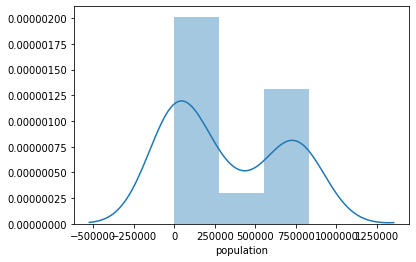

In [27]:
sns.distplot(data["population"], bins=3) #plot a distribution plot for population

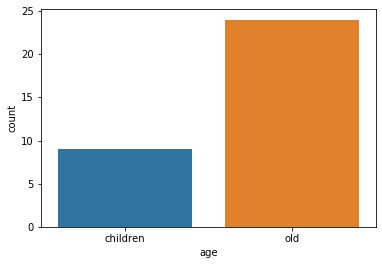

In [28]:
sns.countplot(data=data, x="age", order=("children", "old")) #plot countplot for dayofweek

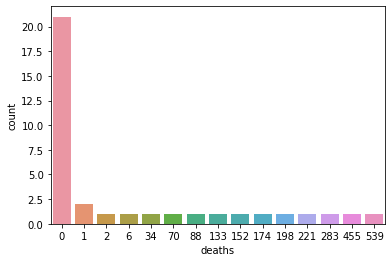

In [29]:
sns.countplot(data=data, x="deaths")

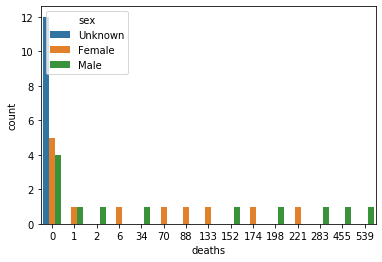

In [30]:
sns.countplot(data=data, x="deaths", hue='sex')

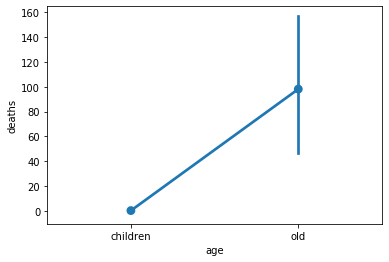

In [31]:
sns.pointplot(data=data, x="age", y="deaths", order=("children", "old"))

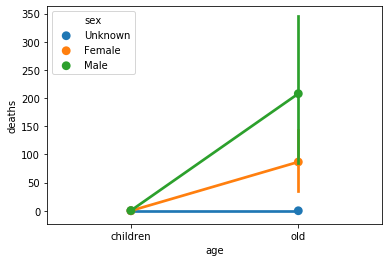

In [32]:
sns.pointplot(data=data, x="age", y="deaths", hue ="sex", order=("children", "old"))

## Excercise
- create different plots with "age_groups"

## Out to CSV

In [33]:
data.columns #look at all column names

Index(['age 11 categories', 'deaths', 'population', 'sex', 'sort',
       'encode_Female', 'encode_Male', 'encode_Unknown', 'Missing', 'age'],
      dtype='object')

In [34]:
data.to_csv("output.csv") #export out to csv file